<a href="https://colab.research.google.com/github/marialejandrapulido1/analitica-negocios/blob/main/PARCIAL_1__MAPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maria Alejandra Pulido**

Parcial 1 - Métodos de clasificación

**Cargas librerias y conectar con Drive**

In [ ]:
#cargar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#librerias del modelo
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

#conectar con la nube
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Descripción de variables**

- Age: Edad de la persona
- Mother Education: Hasta que grado estudio la madre
- Father Education: Hasta que grado estudio el padre
- Family Size: Cantidad de personas en la familia
- Self Esteem: Nivel de autoestima de la persona
- Height: Estatura de la persona
- Weight: Peso de la persona
- Health Plan: Si la persona tiene plan de salud o no
- Income: Ingresos de la persona

# **Naive Bayes**

**Cargar archivos de trabajo**

In [ ]:
#leer archivo
nxl = '/content/drive/MyDrive/ANALITICA/4. BD1_Longitudinal Survey_L_Int.xlsx'
#XDb = X database
XDB = pd.read_excel(nxl, sheet_name= 0)
#revisar si esta bien
XDB.head(4)

#seleccionar variables a trabajar
XDB = XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'HealthPlan', 'Income']]
XDB.dropna(inplace=True)
XDB.head(4)

#definir vectores
XD = XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']]
YD = XDB[['HealthPlan']]

**Implementar Naive Bayes**

In [ ]:
#usar naive bayes
mnb = GaussianNB()
mnb.fit(XD, YD)

#total de datos
ct = mnb.class_count_
print("Total de datos: ", len(XD))

#clasificar los datos en si y no (1, 0)
print("Clasificacion de datos: ", ct)

#porcentaje de cada uno (si y no)
contar = YD.value_counts()
porcat = (contar/len(XD))*100
print("Porcentaje de datos: \n", porcat)

#informacion importante con variable dependiente
#media
media = mnb.theta_
print("Media: \n", media)
#varianza
sd = mnb.var_
#desviacion estandar
sd = np.sqrt(sd)
print("Desviacion estandar: \n", sd)

#identificar limites superiores e inferiores
#limite superior
print("Limite superior de cada categoria: ", media + sd)
#limite inferior
print("Limite inferior de cada categoria: ", media - sd)

#evaluar persona para saber si tiene plan de salud o no
#variables de entrada
persona = [[18, 12, 12, 5, 28, 71, 180, 48000]]
mnb.predict(persona)
#esta persona tiene health plan (1)

#pronostico de positivos y negativos
ydp = mnb.predict(XD)
cm = confusion_matrix(YD, ydp)
print(cm)
#verdaderos y falsos negativos y positivos
VN = cm[0,0]; FP = cm[0,1]; FN = cm[1,0]; VP = cm[1,1]
print("VN: ", VN, "FP: ", FP, "FN: ", FN, "VP: ", VP)

#desempeño del modelo
#exactitud = desempeño del modelo
exactitud = (VP + VN) / (VP + VN + FP + FN)
print('La exactitud con la que funciona el modelo en general es = ', exactitud)

#sensibilidad = como se comporta el modelo con los universitarios
sensibilidad = VP / (VP + FN)
print('La sensibilidad es = ', sensibilidad)

#especificidad = como se comporta el modelo prediciendo los no universitarios
especificidad = VN / (VN + FP)
print('La especificidad es = ', especificidad)

#precision = que tan preciso es el modelo clasificando universitarios
precision = VP / (VP + FP)
print('La precision es = ', precision)

#tasa de error = cuanto se equivoca el modelo
error = (FP + FN) / (VP + VN + FP + FN)
print('La tasa de error es = ', error)

#prediccion negativa = comportamiento del modelo identificando los no universitarios
prediccion_negativa = VN / (VN + FN)
print('La prediccion negativa es = ', prediccion_negativa)

#prediccion positiva
prediccion_positiva = VP / (VP + FP)
print('La prediccion positiva es = ', prediccion_positiva)

#¿De acuerdo con el modelo Naive Bayes, cual es el grupo que posee la mayor edad frente a los que poseen un plan de Salud?
edad =


Total de datos:  5963
Clasificacion de datos:  [ 853. 5110.]
Porcentaje de datos: 
 HealthPlan
1.0           85.69512
0.0           14.30488
Name: count, dtype: float64
Media: 
 [[1.82731536e+01 1.00539273e+01 9.79835873e+00 4.98124267e+00
  2.15439625e+01 6.68968347e+01 1.46289566e+02 1.64244736e+04]
 [1.83774951e+01 1.12438356e+01 1.12348337e+01 4.64559687e+00
  2.26039139e+01 6.69878669e+01 1.45515264e+02 3.52898006e+04]]
Desviacion estandar: 
 [[2.47166531e+00 3.52070605e+00 4.15540015e+00 2.61554378e+00
  4.18019301e+00 4.16013764e+00 2.93967326e+01 2.15253706e+04]
 [2.47220497e+00 3.29361161e+00 4.03693012e+00 2.43738210e+00
  4.19558044e+00 4.18303630e+00 3.02652164e+01 3.63146146e+04]]
Limite superior de cada categoria:  [[2.07448189e+01 1.35746334e+01 1.39537589e+01 7.59678645e+00
  2.57241555e+01 7.10569723e+01 1.75686299e+02 3.79498442e+04]
 [2.08497001e+01 1.45374472e+01 1.52717638e+01 7.08297897e+00
  2.67994943e+01 7.11709032e+01 1.75780481e+02 7.16044152e+04]]
Limite inf

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**Analisis de resultados - Naive Bayes**

Hay un total de 5963 datos de los cuales 5110 (85%) corresponden a las personas que tienen un plan de salud y 853 (15%) a las personas que no tienen.

El modelo contiene 113 verdaderos negativos, 740 falsos positivos, 740 verdaderos positivos y 4845 verdaderos positivos. Esto indica que tiene un buen desempeño general.

Se puede observar que el modelo alcanzó una exactitud por encima del 75% (83%) al igual que una sensibilidad por encima del 75% (94%). Sin embargo, este tiene una especificidad de 13% y una tasa de error de 16%; lo cual indica que se le dificulta detectar correctamente los verdaderos negativos.  El modelo cuenta con una predicción positiva por encima del 80% (86%) y una negativa por debajo del 40% (29%).   

# **Arbol de Decision**

**Cargar archivos de trabajo**

In [ ]:
#leer archivo nuevamente
nxl = '/content/drive/MyDrive/ANALITICA/4. BD1_Longitudinal Survey_L_Int.xlsx'
#XDb = X database
XDB = pd.read_excel(nxl, sheet_name= 0)
#revisar si esta bien
XDB.head(4)

#seleccionar variables a trabajar
XDB = XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'HealthPlan', 'Income']]
XDB.dropna(inplace=True)
XDB.head(4)

#definir vectores
XD = XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']]
YD = XDB[['HealthPlan']]

**Implementar Arbol de decision**

In [ ]:
#modelo y elegir 4 niveles de analisis
#mar = modelo de arbol
mar = DecisionTreeClassifier(criterion = 'gini', max_depth=4)
mar.fit(XD, YD)

#desplegar del arbol
#exportar
from sklearn.tree import export_graphviz
#crear grafico
from pydotplus import graph_from_dot_data

#etiquetar arbol
vs = ['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']

#dejar arbol listo para decargar
dot_data = export_graphviz(mar, feature_names = vs)
graph = graph_from_dot_data(dot_data)
graph.write_png('parcial_arbol.png')

#personas con salud o no
#con salud
consalud = XDB[XDB['HealthPlan'] == 1]
print("Personas con salud: ", len(consalud))
#sin salud
sinsalud = XDB[XDB['HealthPlan'] == 0]
print("Personas sin salud: ", len(sinsalud))
#total de personas
salud = len(XDB)
print("Total de personas: ", salud)

#matriz de confusion
ydp = mar.predict(XD)
cm = confusion_matrix(YD, ydp)
print(cm)

#matriz de confusion con verdaderos negativos y positivos
VN = cm [0,0]; FP = cm [0,1]; FN = cm [1,0]; VP = cm [1,1]
print("VN: ", VN, "FP: ", FP, "FN: ", FN, "VP: ", VP)

#desempeño del modelo
#exactitud = desempeño del modelo
exactitud = (VP + VN) / (VP + VN + FP + FN)
print('La exactitud con la que funciona el modelo en general es = ', exactitud)
#sensibilidad = como se comporta el modelo con los universitarios
sensibilidad = VP / (VP + FN)
print('La sensibilidad es = ', sensibilidad)
#especificidad = como se comporta el modelo prediciendo los no universitarios
especificidad = VN / (VN + FP)
print('La especificidad es = ', especificidad)
#precision = que tan preciso es el modelo clasificando universitarios
precision = VP / (VP + FP)
print('La precision es = ', precision)
#tasa de error = cuanto se equivoca el modelo
error = (FP + FN) / (VP + VN + FP + FN)
print('La tasa de error es = ', error)
#prediccion negativa = comportamiento del modelo identificando los no universitarios
prediccion_negativa = VN / (VN + FN)
print('La prediccion negativa es = ', prediccion_negativa)
#prediccion positiva
prediccion_positiva = VP / (VP + FP)
print('La prediccion positiva es = ', prediccion_positiva)

#regla del negocio para una persona con 18,12,12,5,28,71,180,48000
persona = [[18, 12, 12, 5, 28, 71, 180, 48000]]
mar.predict(persona)
#esta persona tiene health plan (1)

#probabilidad de que la persona con 18,12,12,5,28,71,180,48000 pertenezca a cada una de las categorias de Health Plan
mar.predict_proba(persona)

Personas con salud:  5110
Personas sin salud:  853
Total de personas:  5963
[[   3  850]
 [   0 5110]]
VN:  3 FP:  850 FN:  0 VP:  5110
La exactitud con la que funciona el modelo en general es =  0.8574543015260775
La sensibilidad es =  1.0
La especificidad es =  0.0035169988276670576
La precision es =  0.8573825503355704
La tasa de error es =  0.1425456984739225
La prediccion negativa es =  1.0
La prediccion positiva es =  0.8573825503355704


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.03655462, 0.96344538]])

**Analisis de resultatos - Arboles de decision**

Para la implementación del modelo de arbol de decisión, se tomaron un total de 9 variables, 8 variables socioeconómicas en las que se destacan edad, educación de la madre, educación del padre, número de integrantes en la familia, autoestima, estatura, peso e ingresos; y una variable de salida que le permite evaluar si la persona tiene plan de salud o no. El modelo cuenta con tres nodos puros.

Para la construcción del modelo se tuvieron un total de 5963 datos divididos en 853 que no tienen plan de salud y un total de 5110 que si tienen. Luego de la ejecución del modelo, se logró una exactitud cercana al 85% en promedio, lo que esta por encima del 80% frente a la exactitud, lo que indica la buena calidad del modelo en el pronósitico.

Es importante destacar que el coeficiente de sensibilidad estuvo por encima del 95% (100%) mientras que la predicción negativa también se ubicó por encima del 95% (100%), lo que corrobora el buen funcionamiento general del modelo.

La base de datos completa posee un total de 853 personas sin plan de salud. Luego de la construcción del modelo, se procedio con el pronósitco del valor de título universitario de las personas. Luego se logró un informe de estas personas en donde un total de 853 (14%) no tienen plan de salud y un total de 5110 (85%) si tienen.

**Reglas del negocio**

If Income > 22063, and Income < = 30080, and Height > 66.5, and Height > 79. Siempre que cumplan estas características, la persona no tiene plan de salud (total de datos = 1) (1 no tiene - 100%, 0 si tienen - 0%).

If Income > 22063, and Income > 30080, and Father Education > 4.5, and Weight > 327.5. Siempre que cumplan estas características, la persona no tiene plan de salud (total de datos = 1) (1 no tiene - 100%, 0 si tienen - 0%).

If Income > 22063, and Income < = 30080, and Height < = 66.5, and Height < = 54. Siempre que cumplan estas características, la persona no tiene plan de salud (total de datos = 1) (1 no tiene - 100%, 0 si tienen - 0%).

**Regla del negocio persona específica**

*Datos persona:*
- Age: 18
- Mother Edu: 12
- Father Edu: 12
- Family Size: 5
- Self Esteem: 28
- Height: 71
- Weight: 180
- Income: 48000

*Regla del negocio:*

If Income > 22063, and Income > 30080, and Father Edu > 4.5, and Weight < 327.5. Siempre que se cumplan estas características, la persona tiene una probabilidad de 4% de no tener plan de salud y 96% de si tener. (Total de datos = 2380) (87 no tienen - 4%, 2293 si tienen - 96%).

**Probabilidad persona**

La probabilidad de la persona en pertenecer es de 96%.

# **KMeans**

**Cargar archivos de trabajo**

In [ ]:
#leer archivo nuevamente
nxl = '/content/drive/MyDrive/ANALITICA/4. BD1_Longitudinal Survey_L_Int.xlsx'
#XDb = X database
XDB = pd.read_excel(nxl, sheet_name= 0)
#revisar si esta bien
XDB.head(4)

#seleccionar variables a trabajar
XDB = XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'HealthPlan', 'Income']]
XDB.dropna(inplace=True)
XDB.head(4)

#definir vectores
XD = XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']]
YD = XDB[['HealthPlan']]

**Implementar KMeans**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


,Age,Mother_Edu,Father_Edu,FamilySize,Self_Esteem,Height,Weight,Income
0,18.352564,11.695869,11.824074,4.502137,23.308405,68.292023,152.443732,49125.363248
1,18.383361,10.591343,10.383924,4.854413,21.549185,65.676785,139.277122,4246.270377
2,18.632479,13.256410,13.752137,4.324786,24.897436,69.692308,160.435897,216200.000000
3,18.340949,10.703866,10.568541,4.750439,22.212214,66.659051,144.007030,25652.303603
4,18.348837,12.547804,13.000000,4.426357,24.170543,69.198966,155.121447,88203.589147


Clusters a los que pertenecen las personas:  [1 0 3 ... 0 0 3]


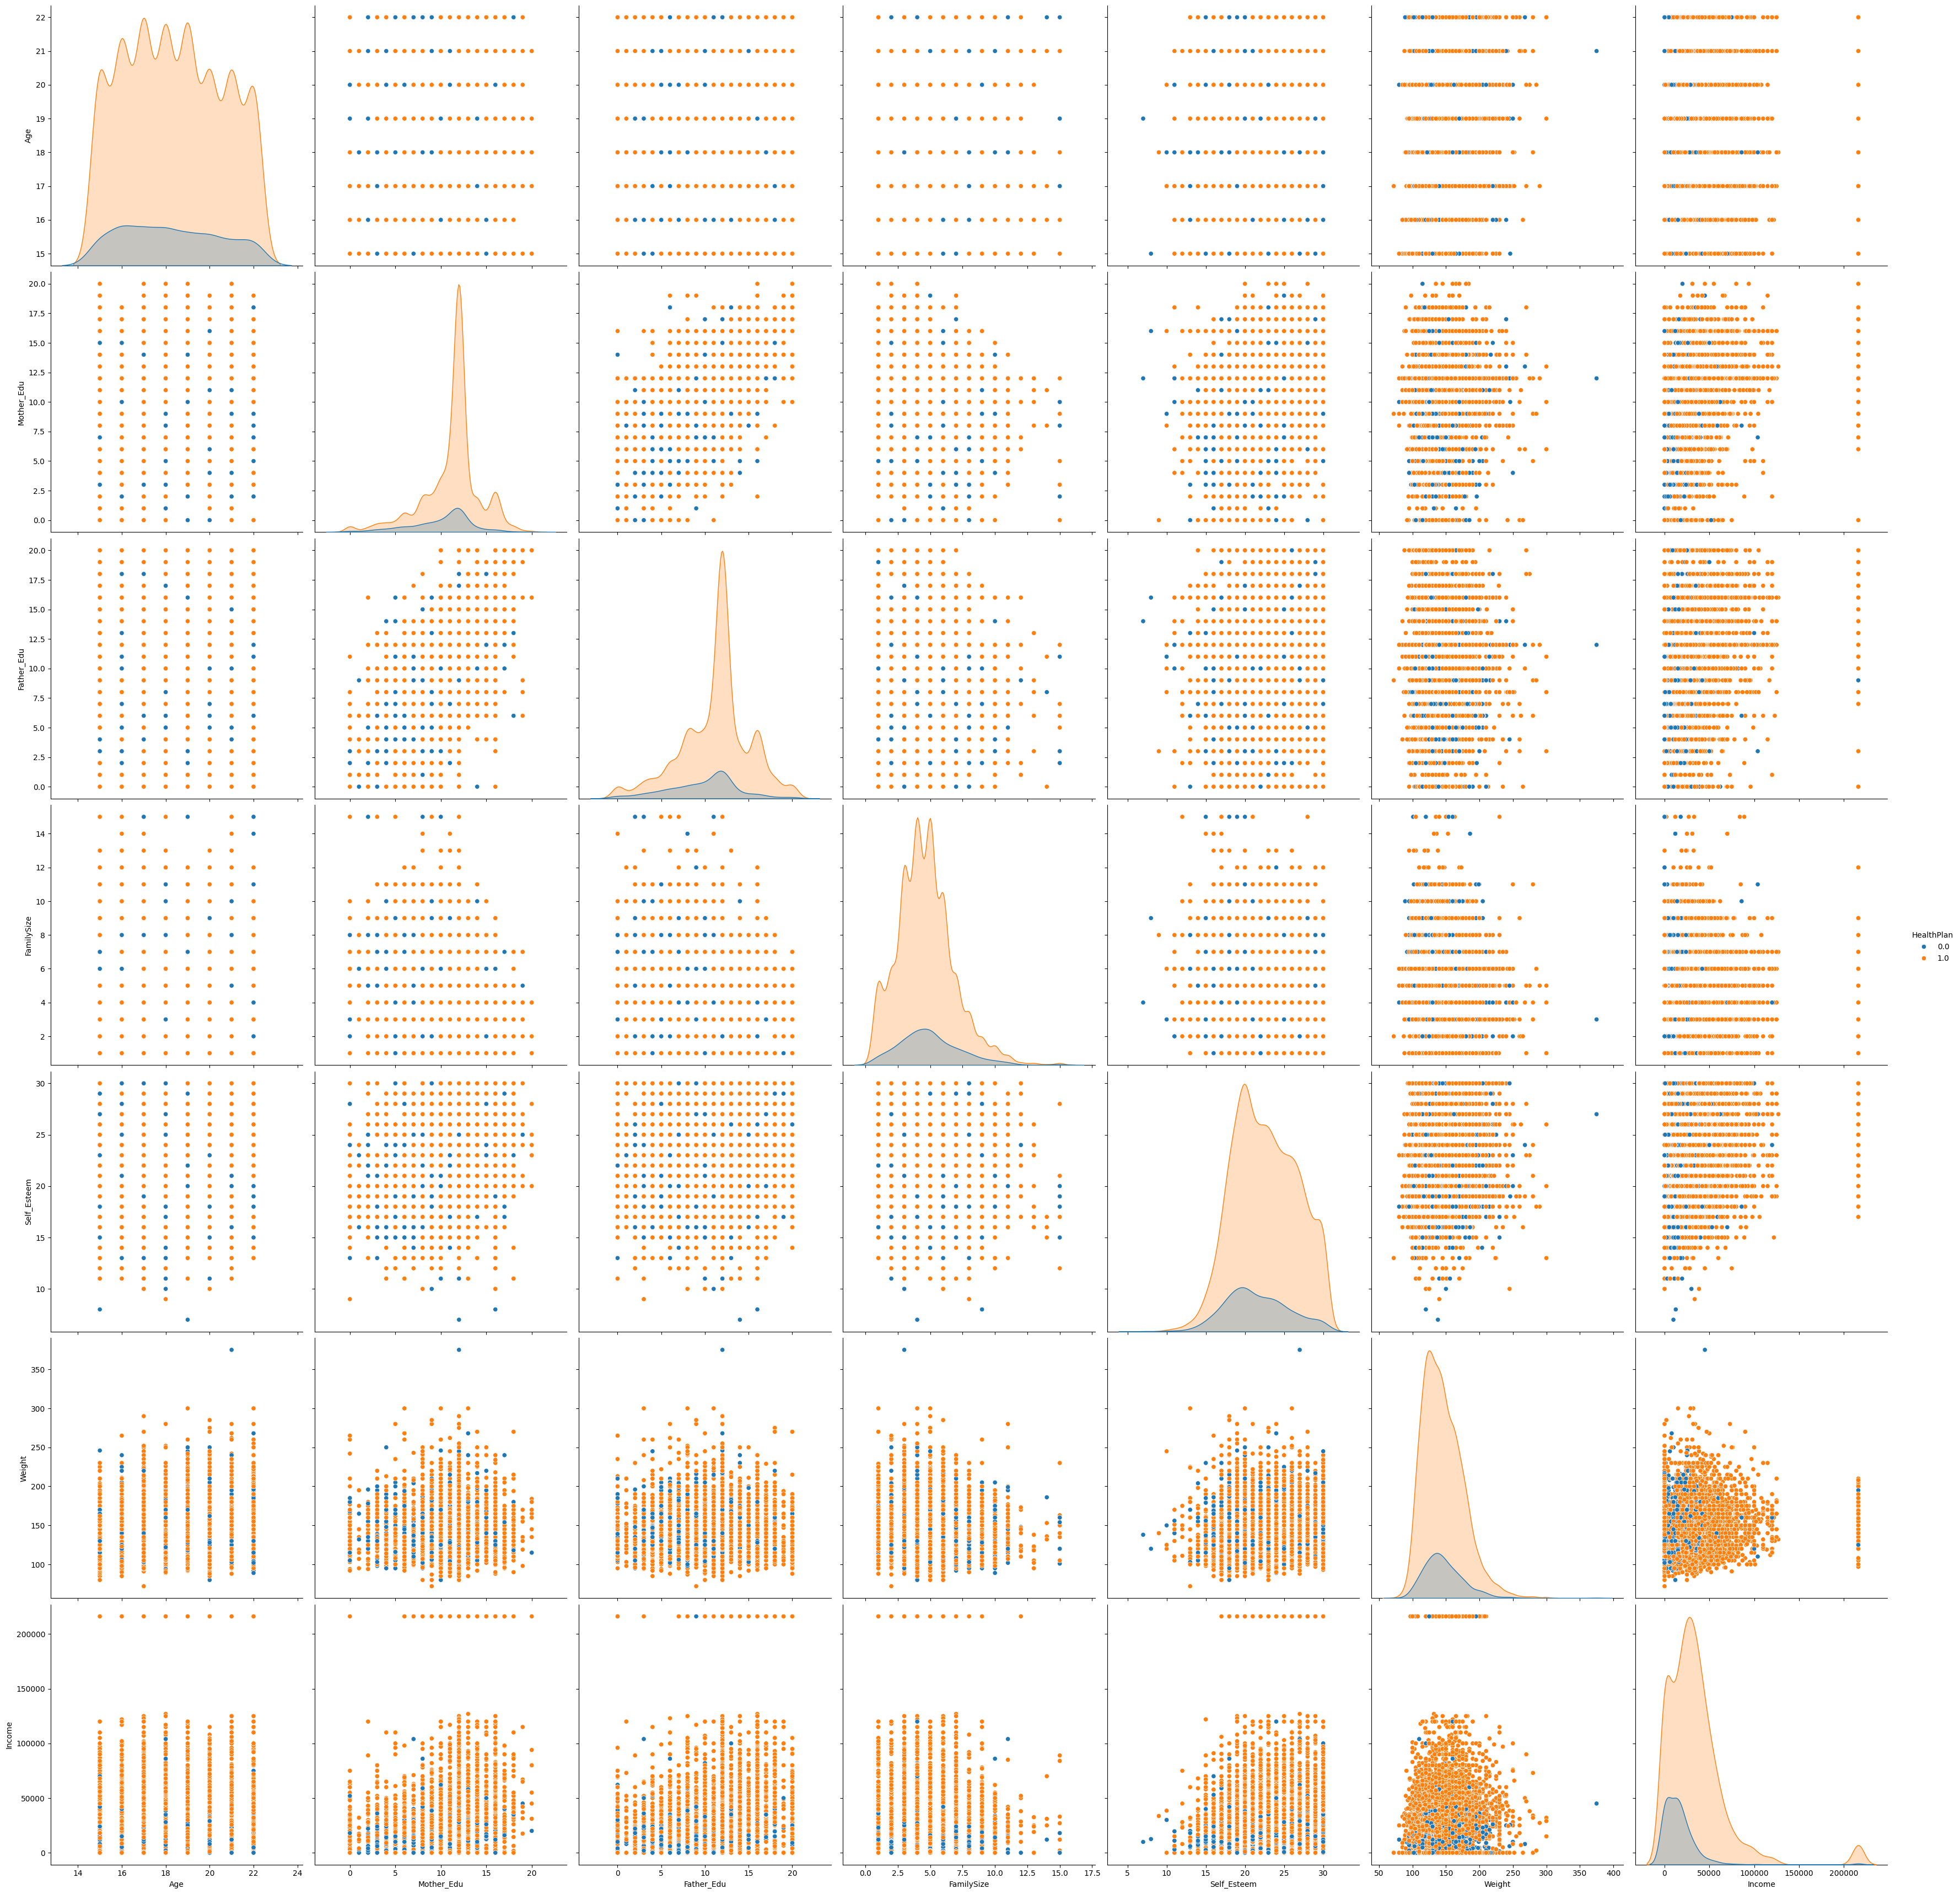

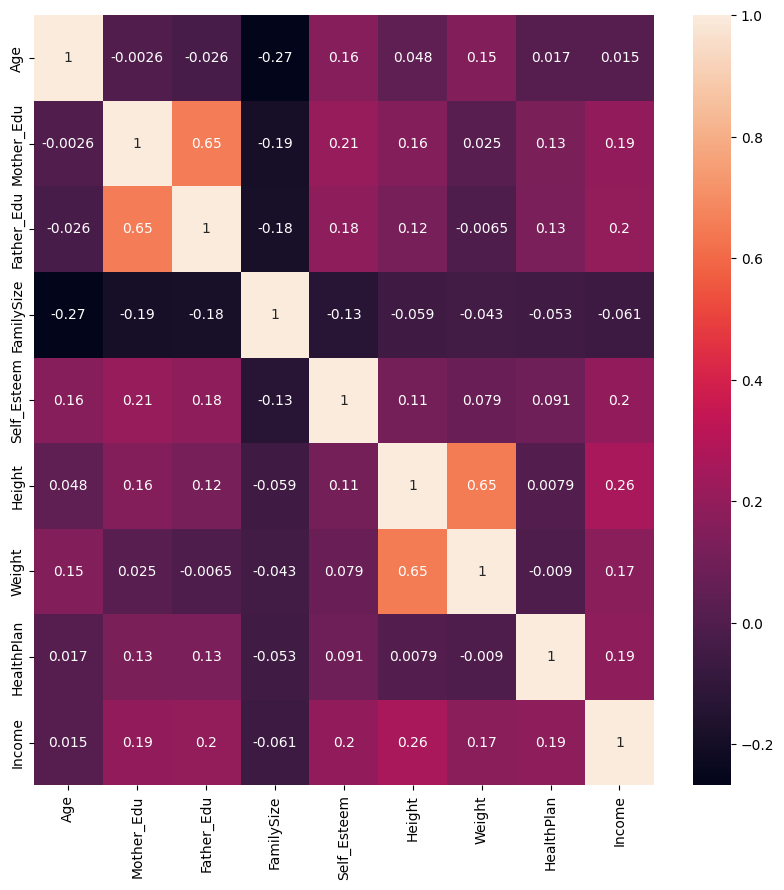

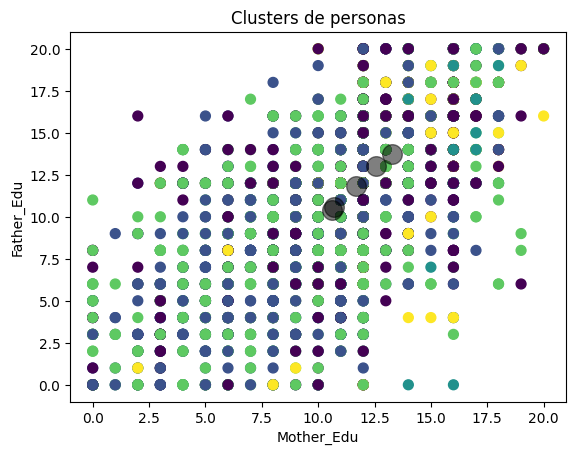

,Age,Mother_Edu,Father_Edu,FamilySize,Self_Esteem,Height,Weight,HealthPlan,Income,Cluster
1,20,5.0,8.0,5,16.0,62.0,120.0,1.0,0.0,1
5,19,12.0,12.0,4,27.0,64.0,200.0,1.0,40000.0,0
6,15,12.0,12.0,3,26.0,65.0,131.0,1.0,25000.0,3
7,21,9.0,6.0,3,23.0,65.0,179.0,1.0,27400.0,3
8,16,12.0,10.0,6,26.0,66.0,145.0,1.0,52000.0,0
...,...,...,...,...,...,...,...,...,...,...
12557,20,12.0,12.0,5,20.0,60.0,110.0,1.0,1000.0,1
12565,20,12.0,11.0,2,24.0,63.0,152.0,1.0,38000.0,0
12647,21,16.0,12.0,1,30.0,70.0,180.0,1.0,43600.0,0
12651,21,16.0,16.0,1,27.0,73.0,170.0,1.0,40000.0,0


El numero de personas con plan de salud por categoria es:           HealthPlan
Cluster            
0              1353
1              1320
2               112
3              1947
4               378
El porcentaje de personas con plan de salud por categoria es:  [[0.96367521]
 [0.74198988]
 [0.95726496]
 [0.85544815]
 [0.97674419]]
El numero de personas sin plan de salud por categoria es:           HealthPlan
Cluster            
0                51
1               459
2                 5
3               329
4                 9
El porcentaje de personas sin plan de salud por categoria es:  [[0.03632479]
 [0.25801012]
 [0.04273504]
 [0.14455185]
 [0.02325581]]


,ND,NApr,NAprp,NNeg,NNegp
0,1404.0,1353.0,0.963675,51.0,0.036325
1,1779.0,1320.0,0.741990,459.0,0.258010
2,117.0,112.0,0.957265,5.0,0.042735
3,2276.0,1947.0,0.855448,329.0,0.144552
4,387.0,378.0,0.976744,9.0,0.023256


Cluster de la persona:  [0]
Porcentaje de aprobacion:  [[0.96367521]]
Porcentaje de negacion:  [[0.03632479]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


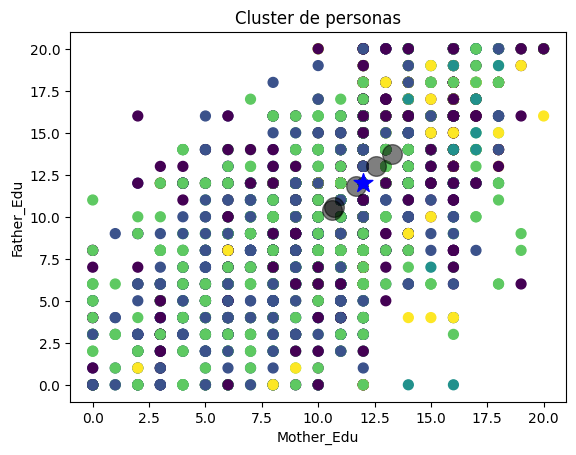

,Age,Mother_Edu,Father_Edu,FamilySize,Self_Esteem,Height,Weight,HealthPlan,Income,Cluster,Pronostico
1,20,5.0,8.0,5,16.0,62.0,120.0,1.0,0.0,1,1.0
5,19,12.0,12.0,4,27.0,64.0,200.0,1.0,40000.0,0,1.0
6,15,12.0,12.0,3,26.0,65.0,131.0,1.0,25000.0,3,1.0
7,21,9.0,6.0,3,23.0,65.0,179.0,1.0,27400.0,3,1.0
8,16,12.0,10.0,6,26.0,66.0,145.0,1.0,52000.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12557,20,12.0,12.0,5,20.0,60.0,110.0,1.0,1000.0,1,1.0
12565,20,12.0,11.0,2,24.0,63.0,152.0,1.0,38000.0,0,1.0
12647,21,16.0,12.0,1,30.0,70.0,180.0,1.0,43600.0,0,1.0
12651,21,16.0,16.0,1,27.0,73.0,170.0,1.0,40000.0,0,1.0


[[   0  853]
 [   0 5110]]
VN:  0 FP:  853 FN:  0 VP:  5110
La exactitud con la que funciona el modelo en general es =  0.8569511990608754
La sensibilidad es =  1.0
La especificidad es =  0.0
La precision es =  0.8569511990608754
La tasa de error es =  0.14304880093912462
La prediccion negativa es =  nan
La prediccion positiva es =  0.8569511990608754


<ipython-input-7-aae80644540f>:125: RuntimeWarning: invalid value encountered in scalar divide
  prediccion_negativa = VN / (VN + FN)


In [ ]:
#graficos de correlacion
sns.pairplot(XDB, hue = 'HealthPlan', size = 5, vars = ['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Weight', 'Income'])
#plt.show()

#heat map
plt.figure(figsize = (10,10))
sns.heatmap(XDB.corr(), annot = True)
#plt.show()

#modelo de clustering
#semillas a buscar
np.random.seed(42)

#numero de clusters - 5
NC = 5
mkm = KMeans(n_clusters = NC, init = 'random', random_state = 42)
mkm.fit(XD)

#graficos creados
dfc = pd.DataFrame(mkm.cluster_centers_)
dfc.columns = ['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']
display(dfc)

#a que cluster pertenece una persona
ydc = mkm.predict(XD)
print("Clusters a los que pertenecen las personas: ", ydc)

#grafica de clusters
centroids = mkm.cluster_centers_
plt.figure()
plt.scatter(XD.iloc[:,1], XD.iloc[:,2], c = ydc, s = 50, cmap = 'viridis')
plt.scatter(centroids[:,1], centroids[:,2], c = 'black', s = 200, alpha = 0.5)
plt.title('Clusters de personas')
plt.xlabel('Mother_Edu')
plt.ylabel('Father_Edu')
plt.show()

#porcentaje de personas con y sin salud
#cantidad de datos por categoria
ND = np.bincount(ydc)
#columna cluster adicional
XDB['Cluster'] = ydc
display(XDB)
#numero de personas con salud por categoria
NApr = XDB.groupby('Cluster').agg({'HealthPlan':lambda x: (x==1).sum()})
print("El numero de personas con plan de salud por categoria es: ", NApr)
NAprp=np.array(NApr)/ND[:, None]
print("El porcentaje de personas con plan de salud por categoria es: ", NAprp)
#numero de personas sin salud por categoria
NNeg=XDB.groupby('Cluster').agg({'HealthPlan':lambda x: (x==0).sum()})
print("El numero de personas sin plan de salud por categoria es: ", NNeg)
NNegp=np.array(NNeg)/ND[:, None]
print("El porcentaje de personas sin plan de salud por categoria es: ", NNegp)
#tabla con la info
df2=pd.DataFrame(np.column_stack((ND, NApr, NAprp, NNeg, NNegp)))
df2.columns=('ND', 'NApr', 'NAprp', 'NNeg', 'NNegp')
display(df2)

#identificar cluster persona especifica
XDN = np.array([18, 12, 12, 5, 28, 71, 180, 48000])
ydn = mkm.predict(XDN.reshape(1, -1))
print("Cluster de la persona: ", ydn)
print("Porcentaje de aprobacion: ", NAprp[ydn])
print("Porcentaje de negacion: ", NNegp[ydn])

#grafica de clusters
plt.figure()
plt.scatter(XD.iloc[:, 1], XD.iloc[:, 2], c=ydc, s=50, cmap='viridis')
plt.scatter(centroids[:,1], centroids[:,2], c='black', s=200, alpha=0.5)
plt.scatter(XDN[1], XDN[2], marker='*', s=200, c='blue')
plt.title('Cluster de personas')
plt.xlabel('Mother_Edu')
plt.ylabel('Father_Edu')
plt.show()

#vector pronostico
ydp = np.zeros((len(ydc), 1))

for k in range(len(ydp)):
  #print('La persona:', k, 'pertenece al cluster', ydc[k])
  #almacenar numero de cluster
  ncl = ydc[k]
  #porcentaje de negacion
  #print('Porcentaje de negación:', NNegp[ncl])
  #porcentaje de aprobacion
  #print('Porcentaje de aprobación:', NAprp[ncl])
  #decir si tiene plan de salud o no
  if NAprp[ncl] > NNegp[ncl]:
    #print("Tiene plan de salud")
    ydp[k]=1
  else:
    #print("No tiene plan de salud")
    ydp[k]=0

#guardar el pronostico en tabla original
XDB['Pronostico']=ydp
display (XDB)
XDB.to_excel('ClustersParcial.xlsx')

#matriz de confusion
cm = confusion_matrix(YD, ydp)
print(cm)

#matriz de confusion con verdaderos negativos y positivos
VN = cm [0,0]; FP = cm [0,1]; FN = cm [1,0]; VP = cm [1,1]
print("VN: ", VN, "FP: ", FP, "FN: ", FN, "VP: ", VP)

#desempeño del modelo
#exactitud = desempeño del modelo
exactitud = (VP + VN) / (VP + VN + FP + FN)
print('La exactitud con la que funciona el modelo en general es = ', exactitud)
#sensibilidad = como se comporta el modelo con los universitarios
sensibilidad = VP / (VP + FN)
print('La sensibilidad es = ', sensibilidad)
#especificidad = como se comporta el modelo prediciendo los no universitarios
especificidad = VN / (VN + FP)
print('La especificidad es = ', especificidad)
#precision = que tan preciso es el modelo clasificando universitarios
precision = VP / (VP + FP)
print('La precision es = ', precision)
#tasa de error = cuanto se equivoca el modelo
error = (FP + FN) / (VP + VN + FP + FN)
print('La tasa de error es = ', error)
#prediccion negativa = comportamiento del modelo identificando los no universitarios
prediccion_negativa = VN / (VN + FN)
print('La prediccion negativa es = ', prediccion_negativa)
#prediccion positiva
prediccion_positiva = VP / (VP + FP)
print('La prediccion positiva es = ', prediccion_positiva)

**Analisis de resultados - KMeans**

Para este estudio de plan de salud se tomaron un total de 5963 de los cuales 5110 tiene plan de salud y 853 no tienen. Para la caracterización de la preaprobación se tomaron 8 variables socioeconómicas que son edad, educación de la madre, educación del padre, número de integrantes en la familia, autoestima, estatura, peso e ingresos.

Para el modelo utilizado para esta caracterización, fue el modelo de agrupación KMeans, el cual mostró que las variables que tenían una mayor correlación entre ellas fueron las variables de Mother Education y Father Education (65%) al igual que Height y Weight (65%), lo que indica que estas variables son las mas relevantes frente a determinar si la persona tiene plan de salud o no.

Para este modelo se tomaron un total de 5 clusters, en donde el cluster 0 mostró la mayor edad (18.6), el cluster 2 la mayor mother education (13.2), el cluster 1 la menor father education (10.3), el cluster 2 el menor family size (4.3), el cluster 2 el mayor self esteem (24.8) al igual que el mayor height (69.6), weight (160) e income (216200). El cluster que presentó la mayor cantidad de datos fue el cluster 3 (2276). El cluster 2 tiene el mayor porcentaje de aprobación para el plan de salud (95%).

De acuerdo con la matriz de confusión, el modelo mostró que funciona con una exactitud de 85% y una tasa de error de 14%. Con estos resultados, se logra concluir que este modelo se considera  útil para realizar el estudio de plan de salud. Sin embargo, se recomienda utiliza un modelo que tenga una exactitud mayor, para obtener mejores resultados.



# **Analisis general de resultados**

Luego de analizar los tres modelos (Naive Bayes, Arbol de decision y KMeans), se logró determinar que el mejor modelo para utilizar en este caso es el Arbol de Decisión. Este demostró tener un 100% de sensibilidad para detectar correctamente los positivos y tiene la exactitud más alta (85.7%). De igual manera, el arbol de decision cuenta con una prediccion negativa del 100%, lo cual muestra que cada que el modelo identifique un negativo, hay total certeza de que realmente lo es. El modelo de Arbol de Decisión tiene una mayor exactitud que el modelo de Naive Bayes y es mejor detectando negativos que el modelo KMeans.

Por otro lado, el modelo KMeans es la "peor" opción para determinar si una persona tiene plan de salud o no. Esto se debe a que el modelo tiene una especificidad de 0%, significa que no logra detectar ningun negativo correctamente.

